# Introduction to Combinatorial and Polyhedral Geometry in Sage

## Important pages available online:

- General Page: https://doc.sagemath.org/html/en/reference/discrete_geometry/index.html
- Thematic Tutorials: https://doc.sagemath.org/html/en/thematic_tutorials/geometry.html

## The Basics: $V$-representation

First, let’s define a polyhedron object as the convex hull of a set of points and some rays.

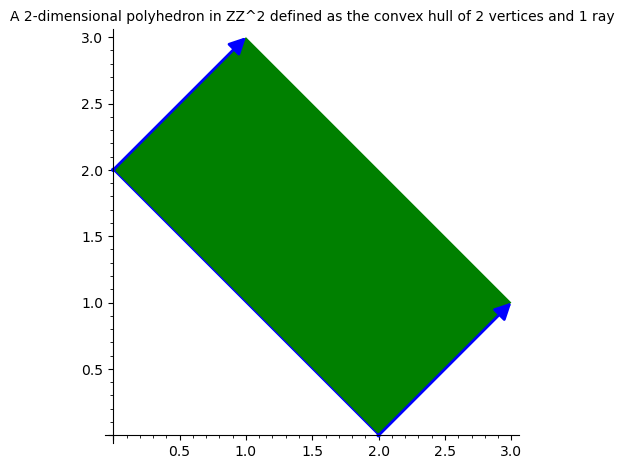

In [2]:
P1 = Polyhedron(vertices=[[2, 0], [0, 2]], rays=[[1, 1]], base_ring=ZZ); P1

### The string representation already gives a lot of information:

* the **dimension** of the polyhedron (the smallest affine space containing it)
* the **dimension of the space** in which it is defined
* the **base ring** ($\mathbb{Z}$) over which the polyhedron lives (this specifies the parent class)
* the **number of vertices**
* the **number of rays**

#### The usual tab completion shows us everything we can do:

In [3]:
P1.

SyntaxError: invalid syntax (2484037782.py, line 1)

We can for example check whether it is a polytope (being compact):

In [4]:
P1.is_compact()

False

The $V$-representation is then:

In [5]:
P1.Vrepresentation()

(A vertex at (0, 2), A ray in the direction (1, 1), A vertex at (2, 0))

### We can also add a lineality space.

In [6]:
P2 = Polyhedron(vertices=[[0.5, 0, 0], [0, 0.5, 0]], rays=[[1, 1, 0]], lines=[[0, 0, 1]]);P2

A 3-dimensional polyhedron in RDF^3 defined as the convex hull of 2 vertices, 1 ray, 1 line (use the .plot() method to plot)

In [7]:
P2.plot()

Graphics3d Object

In [8]:
P2.Vrepresentation()

(A line in the direction (0.0, 0.0, 1.0),
 A ray in the direction (1.0, 1.0, 0.0),
 A vertex at (0.5, 0.0, 0.0),
 A vertex at (0.0, 0.5, 0.0))

### The objects have a specific parent (base ring) and a specific backend

In [9]:
P1.parent(), P1.backend()

(Polyhedra in ZZ^2, 'ppl')

In [10]:
P2.parent(), P2.backend()

(Polyhedra in RDF^3, 'cdd')

The parent information gives the "category" that `P1` belongs to, and helps determine which methods can be computed and which algorithms Sage can use on them. The `backend` is essentially the software used by sage to do most of the computations for this object.

### These two (base ring & backend) determine which methods and algorithms are available/used (the default being `ppl`).

## $H$-representation

A **$\mathbf{H}$-polyhedron** is a subset $P$ of $\mathbb{R}^d$ where $P$ is given by a system of linear inequalities $P = \left\{x : Ax \geq b\right\}$.

In order to create a polyhedron for hyperplanes, we need tell sage the hyperplanes. For this we pass into sage a list $[b, a_1, a_2, \ldots, a_n]$ where $(a_1, a_2, \ldots, a_n) x + b \geq 0$. **Notice here that $b$ changes sign**. Let's look at an example.

In the example below, $H_1$ represents the hyperplane $1x_1 -x_2 \geq -2$. To work with sage, we move the $-2$ over and convert $x_1$ and $x_2$ into a column vector $x$ to get $(1, -1)x +2 \geq 0$ giving us the list $\left[2, 1, -1\right]$.

If a polyhedron object was constructed via a $V$-representation, Sage can provide the $H$-representation of the object.

In [11]:
for h in P1.Hrepresentation():
    print(h)

An inequality (1, -1) x + 2 >= 0
An inequality (1, 1) x - 2 >= 0
An inequality (-1, 1) x + 2 >= 0


We can then verify that both inputs gave the same objects

In [12]:
newP1 = Polyhedron(ieqs=[[2,1,-1],[-2,1,1],[2,-1,1]]); newP1 == P1

True

In order to know more about how to create a polyhedron and all the possible options, we use `?`:

In [13]:
Polyhedron?

Signature:     
Polyhedron(
    vertices=None,
    rays=None,
    lines=None,
    ieqs=None,
    eqns=None,
    ambient_dim=None,
    base_ring=None,
    minimize=True,
    verbose=False,
    backend=None,
    mutable=False,
)
Docstring:     
   Construct a polyhedron object.

   You may either define it with vertex/ray/line or
   inequalities/equations data, but not both. Redundant data will
   automatically be removed (unless "minimize=False"), and the
   complementary representation will be computed.

   INPUT:

   * "vertices" -- iterable of points. Each point can be specified as
     any iterable container of "base_ring" elements. If "rays" or
     "lines" are specified but no "vertices", the origin is taken to
     be the single vertex.

     Instead of vertices, the first argument can also be an object
     that can be converted to a "Polyhedron()" via an
     "as_polyhedron()" or "polyhedron()" method. In this case, the
     following 5 arguments cannot be provided.

   * "rays

## A large library of precomputed polytopes:

You can see the list of all the precomputed examples of polytopes on the webpage:

http://doc.sagemath.org/html/en/reference/discrete_geometry/sage/geometry/polyhedron/library.html

or use `TAB` completion on the library: `polytopes.`

In [14]:
polytopes.

SyntaxError: invalid syntax (2651234991.py, line 1)

Here are polytopes that we dealt with in the courses:

+ Standard simplices
+ Cross-polytopes
+ Hypercubes
+ Hypersimplices
+ Cyclic polytopes
+ etc.

and how to get them:

In [15]:
simplex = polytopes.simplex(3);print(simplex)
cross = polytopes.cross_polytope(3);print(cross)
hyperc = polytopes.hypercube(4);print(hyperc)
hypers = polytopes.hypersimplex(6,3);print(hypers)
cyclic = polytopes.cyclic_polytope(4,8);print(cyclic)

A 3-dimensional polyhedron in ZZ^4 defined as the convex hull of 4 vertices
A 3-dimensional polyhedron in ZZ^3 defined as the convex hull of 6 vertices
A 4-dimensional polyhedron in ZZ^4 defined as the convex hull of 16 vertices
A 5-dimensional polyhedron in ZZ^6 defined as the convex hull of 20 vertices
A 4-dimensional polyhedron in QQ^4 defined as the convex hull of 8 vertices


## Representation objects are classes too!

Sage has classes implemented for $H$- and $V$-representations and faces of polyhedron.

### $H$-representation

You can store the $H$-representation in a variable and use the inequalities and equalities as objects.

In [16]:
HRep = P2.Hrepresentation()

In [17]:
H1 = HRep[0]; H1

An inequality (-2.0, 2.0, 0.0) x + 1.0 >= 0

You can get back the vector and right-hand side:

In [18]:
H1.A(), H1.b()

((-2.0, 2.0, 0.0), 1.0)

You can also obtain the inequality as a polyhedron object itself:

In [19]:
H1.polyhedron()

A 3-dimensional polyhedron in RDF^3 defined as the convex hull of 2 vertices, 1 ray, 1 line (use the .plot() method to plot)

### $V$-representation

Similarly, you can access vertices, rays and lines of the polyhedron.

In [20]:
VRep = P2.Vrepresentation(); VRep

(A line in the direction (0.0, 0.0, 1.0),
 A ray in the direction (1.0, 1.0, 0.0),
 A vertex at (0.5, 0.0, 0.0),
 A vertex at (0.0, 0.5, 0.0))

In [21]:
L = VRep[0]; L

A line in the direction (0.0, 0.0, 1.0)

In [22]:
list(L.neighbors())

[A ray in the direction (1.0, 1.0, 0.0),
 A vertex at (0.5, 0.0, 0.0),
 A vertex at (0.0, 0.5, 0.0)]

### Faces:

In [23]:
aface = P1.faces(1)[1]; aface

A 1-dimensional face of a Polyhedron in ZZ^2 defined as the convex hull of 2 vertices

You can get the indices of the vertices that belong to a certain face:

In [24]:
aface.ambient_V_indices()

(0, 2)

And you can examine all the possibilities using again the tab completion on `aface` to see all that Sage offers on that face!

You can get the face lattice this way:

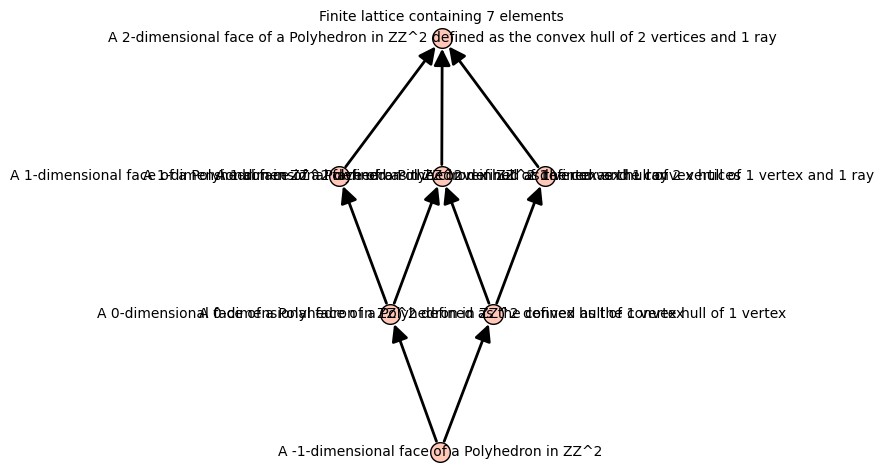

In [25]:
P1.face_lattice()

## The algebra of polytopes: classical operations

### Polar and Dilation

In [24]:
Cube = polytopes.cube()             # [-1,1]-cube
Octahedron = 3/2 * Cube.polar()     # Dilation

Dilation is especially important when studying Ehrhart theory!
Examine the following example:

In [25]:
Cube.integral_points_count() # That is because it is the [-1,1] cube

27

To get the [0,1] hypercubes, we do:

In [26]:
hc = polytopes.hypercube(3,intervals='zero_one');hc

A 3-dimensional polyhedron in ZZ^3 defined as the convex hull of 8 vertices (use the .plot() method to plot)

In [27]:
hc.integral_points_count()

8

In [28]:
[(k*hc).integral_points_count() for k in range(5)]

[1, 8, 27, 64, 125]

In [29]:
(hc.plot(opacity=0.5)+(2*hc).plot(opacity=0.5)+(3*hc).plot(opacity=0.5))

Graphics3d Object

We can verify that evaluating the ehrhart polynomial gives the same (as it should!):

In [30]:
[hc.ehrhart_polynomial()(k) for k in range(5)]

[1, 8, 27, 64, 125]

### Minkowski sum

In [31]:
Cuboctahedron = Cube + Octahedron   # Minkowski sum
Cuboctahedron.show()

Graphics3d Object

### Minkowski difference (when it makes sense)

In [32]:
Mdiff = Cuboctahedron - Cube        # Minkowski difference
Mdiff.plot()

Graphics3d Object

### Intersection

In [33]:
Permu = Cube & Octahedron           # Intersection, same as   Cube.intersection(Octahedron)
Permu.show(opacity=0.5)

Graphics3d Object

### Cartesian product

In [34]:
CP = Cube * Octahedron; CP          # Cartesian product

A 6-dimensional polyhedron in QQ^6 defined as the convex hull of 48 vertices (use the .plot() method to plot)

In [35]:
CP.f_vector()

(1, 48, 168, 244, 182, 72, 14, 1)

## Transformations of polytopes

It is possible to do many operations on polytopes that alter them.

### Affine transformation through coersion

It is possible to transform a polyhedron $P$ using an affince transformation: $T\cdot P + v$ where $T$ is a matrix and $v$ is a vector:

In [36]:
zo_cube = polytopes.cube(intervals='zero_one').change_ring(QQ) # (0,1) 3-d cube
transformation = matrix(AA,[[1,sqrt(2),sqrt(3)],[0,1,sqrt(5)],[0,0,1]])
skew_cube = (transformation * zo_cube) + vector([0,0,1/2])   # affinely transformed
skew_cube.plot(color='blue',opacity=0.75) + zo_cube.plot(color='red',opacity=0.75)

Graphics3d Object

In [37]:
print("The cube base ring is: {}".format(zo_cube.base_ring()))
print("The skew cube base ring is: {}\n".format(skew_cube.base_ring()))
print("The cube backend is: {}".format(zo_cube.backend()))
print("The skew cube backend is: {}".format(skew_cube.backend()))

The cube base ring is: Rational Field
The skew cube base ring is: Algebraic Real Field

The cube backend is: ppl
The skew cube backend is: field


### Truncation:

In [38]:
a_vertex = Cube.faces(0)[0] # I am choosing
Vtrunc_Cube = Cube.face_truncation(a_vertex) # This operation chops a vertex from the polytope
Vtrunc_Cube.plot()

Graphics3d Object

### Face split

This increases the dimension of the polytope by one. It is like a bipyramid, but with the 2 vertices on top of the chosen face:

In [39]:
FS = Cube.face_split(a_vertex);print(FS)
FS.plot()

A 4-dimensional polyhedron in QQ^4 defined as the convex hull of 9 vertices


Graphics3d Object

### Face stacking

Stacking a face is obtained by adding a new vertex slightly outside a chosen face. The result highly depends on the choice of face.

In [40]:
another_face = Octahedron.faces(1)[0] # stacking on an edge
stacked_octa = Octahedron.stack(another_face)
stacked_octa.plot()

Graphics3d Object

In [41]:
yet_another_face = Octahedron.faces(2)[0]
second_stacked_octa = Octahedron.stack(yet_another_face)
second_stacked_octa.plot()

Graphics3d Object

## Combinatorial equivalence

In [42]:
co = polytopes.cuboctahedron()
another_co = Cube & (2 * Cube.polar())
yet_another_co = Cube.truncation(1/2)

co.is_combinatorially_isomorphic(another_co), co.is_combinatorially_isomorphic(yet_another_co)

(True, True)

### There are many more operations that are possible: http://doc.sagemath.org/html/en/thematic_tutorials/geometry/polyhedra_quickref.html

## Important properties of polytopes

### $f$-vectors

It is very easy to get the $f$-vector of polytopes:

In [43]:
print(simplex.f_vector())
print(cross.f_vector())

(1, 4, 6, 4, 1)
(1, 6, 12, 8, 1)


### Computing the volume of polytopes

In [44]:
Permu.volume()                    # default

4

In [45]:
Permu.volume(engine='latte')      # uses LattE Integrale

4

In [46]:
# uses normaliz, which requires to change the backend.
Permu.base_extend(base_ring=QQ,backend='normaliz').volume(engine='normaliz')

4

In [47]:
Permu.volume(engine='lrs')

4

### $h^*$-vectors of lattice polytopes

Certain backends have some more features that are interfaced. $h^*$-vector is an example with `normaliz`:

In [48]:
Cube = polytopes.cube(intervals='zero_one',backend='normaliz')   # [0,1]-cube
Cube.h_star_vector()

[1, 4, 1]

### Ehrhart polynomials are also available through latte or normaliz

In [49]:
Cube.ehrhart_polynomial(engine='latte').factor()  # Computed via latte

(t + 1)^3

In [50]:
Cube.ehrhart_polynomial(engine='normaliz').factor()  # Computed via normaliz, the backend should be normaliz

(t + 1)^3

### Simplicity, simpliciality, neighborliness, $g$-vector, etc.

In [51]:
nb = 10
pts=[vector([QQ(random()) for i in range(8)]) for ii in range(nb)]
mpts = [-_ for _ in pts]
new_poly = Polyhedron(pts+mpts,backend='normaliz');new_poly

A 8-dimensional polyhedron in QQ^8 defined as the convex hull of 20 vertices (use the .plot() method to plot)

In [52]:
print(new_poly.neighborliness())

1


In [53]:
new_poly.simplicity()

1

In [54]:
new_poly.simpliciality() # Should be 7 if it is simplicial!

7

In [55]:
new_poly.boundary_complex().g_vector()

[1, 11, 54, 146, 110]

## Exercises

### Exercise 1:

Compute the $f$-vector of the cyclic polytope of dimension 5 with 17 vertices.

In [56]:
polytopes.cyclic_polytope(5,17).f_vector()

(1, 17, 136, 394, 455, 182, 1)

### Exercise 2:

In this exercise, you will construct the cuboctahedron in several different ways and verify that you get the same combinatorial type.

1) The first options is to check if it is in the library:

In [ ]:
CO = polytopes.cuboctahedron()

Let's see if it looks like what we expect:

In [ ]:
CO.plot()

We can ask the $f$-vector of the cuboctahedron:

In [ ]:
CO.f_vector()

2) The second construction uses the fact that we can truncate the vertices by new hyperplanes that cross the edges exactly at the mid-point.

In [ ]:
Cube = polytopes.cube()
EC = Cube.truncation(1/2)

Just to make a sanity check we can compute the f-vector:

In [ ]:
EC.f_vector()

But as we know, two different polytopes can have the same f-vector, so we should check if they are combinatorially isomorphic:


In [ ]:
EC.is_combinatorially_isomorphic(CO)

3) The third construction will use some nice trick that we can do in sage.

We can take the polar dual of the cube, the octahedron, and scale it by a factor 2:

In [ ]:
OC = 2*Cube.polar()

In [ ]:
ECCO = Cube & OC

What is ECCO isomorphic to?

In [ ]:
ECCO.is_combinatorially_isomorphic(CO)

That's it! You found 3 ways to construct the cuboctahedron.

* Question: do they all have the same vertices?
* Question: which polytope do we get if we dilate the octahedron by only 3/2 instead of 2?
* Can you find this polytope in the library and check if it is isomorphic?

### Exercise 3:

In this exercise, you will be asked to compute the following properties of certain polytopes:

 - $f$-vectors
 - $h$-vectors and $g$-vectors of simplicial polytopes
 - determine if it is simplicial

And some operations you can do on polytopes:

 - bipyramids
 - stacking

See <https://doc.sagemath.org/html/en/thematic_tutorials/geometry/polyhedra_quickref.html> for a more comprehensive list of operations you can do on polytopes.

Let's say you would like to study the effect of stacking on the $f$-vector of a certain family of polytopes which is centrally symmetric.

First, let's pick random points and generate a centrally symmetric polytope:

In [95]:
nb = 10
pts=[vector([QQ(random()) for i in range(3)]) for ii in range(nb)]
mpts = [-_ for _ in pts]
startp = Polyhedron(pts+mpts)
startp.plot()

Graphics3d Object

Let's make sure it is simplicial:

In [96]:
startp.is_simplicial()

True

Let's now compute its $f$-vector:

In [97]:
startp.f_vector()

(1, 12, 30, 20, 1)

Obtain the $g$-vector of `startp`

In [98]:
startp.boundary_complex().g_vector()

[1, 8]

**Task 1** : Determine what is the effect of stacking a facets on the $g$-vector of a 3d simplicial polytope.

In [99]:
startp.stack(startp.facets()[0]).boundary_complex().g_vector() # It increases by 1 the second value!

[1, 9]

**Task 2** : Determine what is the effect on $g$-vectors of taking the bipyramid of simplicial polytopes.

In [100]:
startp.bipyramid().boundary_complex().g_vector() # Can you guess??

[1, 9, 8]